In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import xarray as xr
import glob
from cartopy import crs as ccrs
import matplotlib.path as mpath
import matplotlib.ticker as ticker

In [30]:
path = '/disco/share/sh1293/OpenMARS_data/Isentropic/'
my = 27
files = glob.glob(path + '*my*.nc')
i = 0
for file in files:
    print(file)
    ds = xr.open_dataset(file)
    d1 = ds.PV[:,4,:9,:]
    #d1['Ls'] = ds.Ls[:,:]
    if i == 0:
        d = d1
    else:
        d = xr.concat([d, d1], 'time')
    i += 1

/disco/share/sh1293/OpenMARS_data/Isentropic/isentropic_openmars_my27.nc
/disco/share/sh1293/OpenMARS_data/Isentropic/isentropic_openmars_my28.nc
/disco/share/sh1293/OpenMARS_data/Isentropic/isentropic_openmars_my29.nc
/disco/share/sh1293/OpenMARS_data/Isentropic/isentropic_openmars_my30.nc
/disco/share/sh1293/OpenMARS_data/Isentropic/isentropic_openmars_my31.nc


KeyboardInterrupt: 

In [31]:
data = xr.open_mfdataset(path + '*my*.nc').PV[:,4,:9,:]

/emmy-noether/home/sh1293/miniforge3/envs/analysis/lib/python3.9/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/emmy-noether/home/sh1293/miniforge3/envs/analysis/lib/python3.9/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[in

KeyboardInterrupt: 

In [29]:
f

<xarray.DataArray 'PV' (time: 214, lat: 9, lon: 73)>
[140598 values with dtype=float64]
Coordinates:
  * time     (time) float32 8.023e+03 8.023e+03 ... 8.041e+03 8.041e+03
  * lat      (lat) float32 87.5 82.5 77.5 72.5 67.5 62.5 57.5 52.5 47.5
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 ... 170.0 175.0 360.0
    level    float64 300.0

In [20]:
def animate(i):
    #ax.clear()
    cf = ax.contourf(d[i,:,:].lon, d[i,:,:].lat, d[i,:,:].values, transform = ccrs.PlateCarree(), levels = 21,
                     vmax = zmax, vmin = zmin)
    plt.title('My%.0f Ls%.2f' %(my, d.Ls[i,0].values))
    #plt.colorbar(cf, ax = ax)
    return cf

creating animation
saving animation


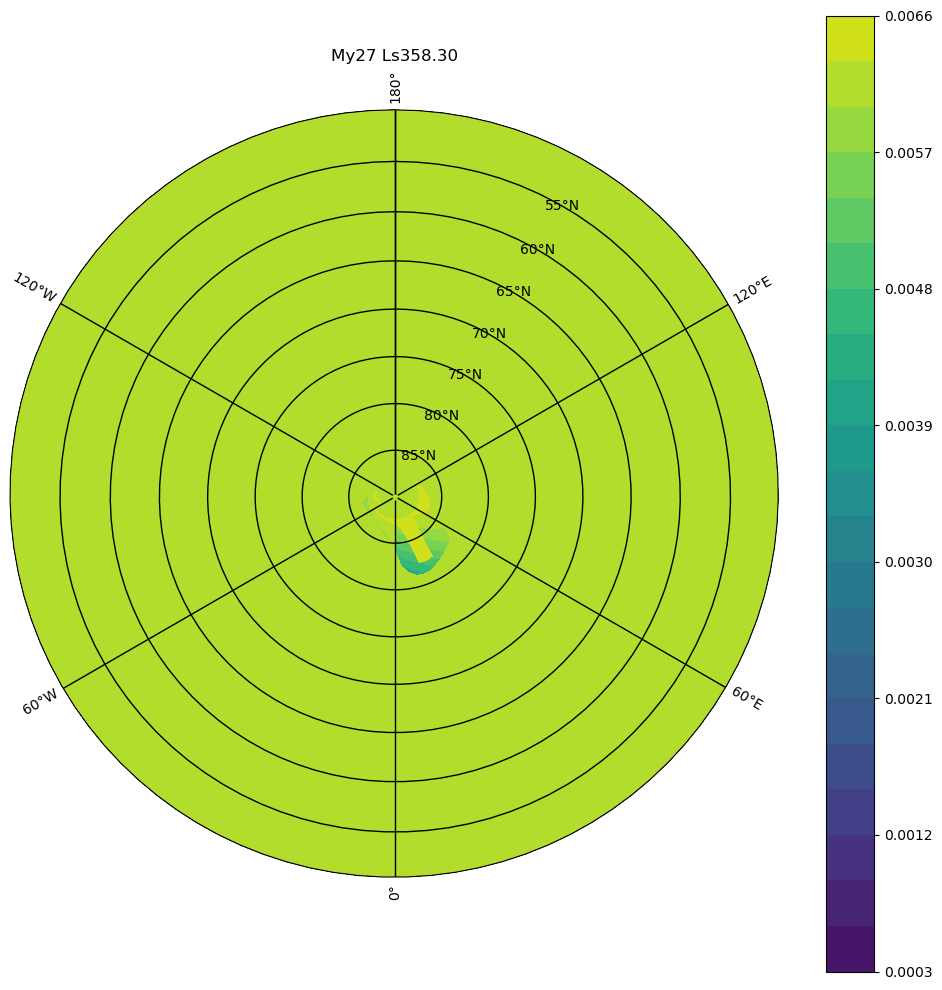

In [21]:
fig, ax = plt.subplots(figsize = (10,10), subplot_kw={'projection':ccrs.NorthPolarStereo()})

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
gl = ax.gridlines(crs = ccrs.PlateCarree(), linewidth = 1, linestyle = '-', color = 'black', alpha = 1, draw_labels=True)
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180,180,50,90], crs=ccrs.PlateCarree())

zmax = np.max(d.values)
zmin = np.min(d.values)

contourplot = ax.contourf(d[0,:,:].lon, d[0,:,:].lat, d[0,:,:].values, transform = ccrs.PlateCarree(), levels = 21,
                          vmax = zmax, vmin = zmin)
cbar = plt.colorbar(contourplot)

print('creating animation')
ani = animation.FuncAnimation(fig=fig, func=animate, frames = int(len(d[:,0,0])/4), interval = 0.1)

fig.tight_layout()

print('saving animation')
ani.save('/home/links/sh1293/Reanalysis/plot.gif', writer = 'pillow')